# Part I - Prosper Loan data Exploration Project
## by Kevin Austine Otieno

## Introduction
### The Prosper Loan data data set
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
For this project I only chose to work with 19 variable that I felt were directly aligned with the question i was looking to find answers for. Among them as below

>- **Term**,  - The length of the loan expressed in months.
>- **LoanStatus**  - The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue.
>- **BorrowerRate** - The Borrower's interest rate for this loan. 
>- **IncomeRange** - The income range of the borrower at the time the listing was created.
>- **IsBorrowerHomeowne**r -A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide  documentation confirming they are a homeowner.
>- **ProsperRating (Alpha)** - The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
>- **ListingCategory (numeric)** - The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 
>- **Baby&Adoption,** 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
>- **BorrowerState** - The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
>- **EmploymentStatus** - The employment status of the borrower at the time they posted the listing.
>- **EmploymentStatusDuration** - The length in months of the employment status at the time the listing was created.
>- **DelinquenciesLast7Years** - Number of delinquencies in the past 7 years at the time the credit profile was pulled.
>- **MonthlyLoanPayment** - The scheduled monthly loan payment.
>- **StatedMonthlyIncome** - The monthly income the borrower stated at the time the listing was created.
>- **TotalProsperLoans** - Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans. 
>- **LoanOriginalAmount** - The origination amount of the loan.
>- **LoanOriginationDate** - The date the loan was originated.
>- **Recommendations** - Number of recommendations the borrower had at the time the listing was created.


## Preliminary Wrangling


In [51]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sb
import calendar, datetime as dt
from pylab import rcParams
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
url = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv'
data = requests.get(url)
with open('prosperLoanData.csv', mode='wb') as csv_file:
    csv_file.write(data.content)

In [52]:
loan_data = pd.read_csv('prosperLoanData.csv')
loan_data.head(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [53]:
loan_data.shape

(113937, 81)

In [54]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [55]:
loan_data['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

### What is the structure of your dataset?

> There are 113937 records of loans as per memberkey in the dataset accross 81 variables. 
> The data can be broadly broken into 
- Borrower data
- Loan perfomance data
- lending information

### What is/are the main feature(s) of interest in your dataset?

> The purpose for my selecting of this dataset is to find out what how various variables/factors affect the loans instake and performance by the borrowers with major on dafulted and completed loans

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  'MemberKey','Term','LoanStatus','BorrowerRate','IncomeRange','IsBorrowerHomeowner','ProsperRating (Alpha)','ListingCategory (numeric)', 'BorrowerState', 'EmploymentStatus', 'EmploymentStatusDuration', 'DelinquenciesLast7Years', 'MonthlyLoanPayment', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount', 'LoanOriginationDate', 'Recommendations'

## Univariate Exploration


> For this project i'm only going to work with the following columns since I consider 81 columns too big

In [56]:
columns = ['MemberKey','Term','LoanStatus','BorrowerRate','IncomeRange','IsBorrowerHomeowner','ProsperRating (Alpha)','ListingCategory (numeric)','BorrowerState','EmploymentStatus',
           'EmploymentStatusDuration','DelinquenciesLast7Years','MonthlyLoanPayment','StatedMonthlyIncome','TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate','Recommendations']

In [57]:
loans = loan_data[columns]
loans.head()


,MemberKey,Term,LoanStatus,BorrowerRate,IncomeRange,IsBorrowerHomeowner,ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,EmploymentStatus,EmploymentStatusDuration,DelinquenciesLast7Years,MonthlyLoanPayment,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations
0,1F3E3376408759268057EDA,36,Completed,0.1580,"$25,000-49,999",True,NaN,0,CO,Self-employed,2.0,4.0,330.43,3083.333333,NaN,9425,2007-09-12 00:00:00,0
1,1D13370546739025387B2F4,36,Current,0.0920,"$50,000-74,999",False,A,2,CO,Employed,44.0,0.0,318.93,6125.000000,NaN,10000,2014-03-03 00:00:00,0
2,5F7033715035555618FA612,36,Completed,0.2750,Not displayed,False,NaN,0,GA,Not available,NaN,0.0,123.32,2083.333333,NaN,3001,2007-01-17 00:00:00,0
3,9ADE356069835475068C6D2,36,Current,0.0974,"$25,000-49,999",True,A,16,GA,Employed,113.0,14.0,321.45,2875.000000,NaN,10000,2012-11-01 00:00:00,0
4,36CE356043264555721F06C,36,Current,0.2085,"$100,000+",True,D,2,MN,Employed,44.0,0.0,563.97,9583.333333,1.0,15000,2013-09-20 00:00:00,0


In [58]:
loans.shape

(113937, 18)

In [59]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
MemberKey                    113937 non-null object
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerRate                 113937 non-null float64
IncomeRange                  113937 non-null object
IsBorrowerHomeowner          113937 non-null bool
ProsperRating (Alpha)        84853 non-null object
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
EmploymentStatus             111682 non-null object
EmploymentStatusDuration     106312 non-null float64
DelinquenciesLast7Years      112947 non-null float64
MonthlyLoanPayment           113937 non-null float64
StatedMonthlyIncome          113937 non-null float64
TotalProsperLoans            22085 non-null float64
LoanOriginalAmount           113937 non-null int64
LoanOriginationDate          113937 non-null object
Recomm

>Some data cleaning needed

In [60]:
#Change LoanOriginationDate to datetime
loans['LoanOriginationDate'] = pd.to_datetime(loans['LoanOriginationDate'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [61]:
#From the information given, the prosperrating only uses data from listing in 2009, we will have to discard rows prior to 2009
loans = loans.dropna(subset=['ProsperRating (Alpha)'])


In [62]:
loans.shape

(84853, 18)

In [63]:
#Convert listing category from numeric to alpha
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].replace([0,1,2,3,4,5,6 ,7, 8, 9, 10, 11 , 12, 13, 14, 15, 16, 17, 18, 19, 20],['Not Available','Debt Consolidation','Home Improvement','Business','Personal Loan','Student Use','Auto','Other','Baby&Adoption','Boat','Cosmetic Procedure','Engagement Ring','Green Loans','Household Expenses','Large Purchases','Medical/Dental','Motorcycle','RV','Taxes','Vacation','Wedding Loans'])
#Rename ListingCategory (numeric) to ListingCatogory (Alpha)
loans.rename(columns={'ListingCategory (numeric)':'ListingCategory (Alpha)'}, inplace=True)
loans.columns


Index(['MemberKey', 'Term', 'LoanStatus', 'BorrowerRate', 'IncomeRange',
       'IsBorrowerHomeowner', 'ProsperRating (Alpha)',
       'ListingCategory (Alpha)', 'BorrowerState', 'EmploymentStatus',
       'EmploymentStatusDuration', 'DelinquenciesLast7Years',
       'MonthlyLoanPayment', 'StatedMonthlyIncome', 'TotalProsperLoans',
       'LoanOriginalAmount', 'LoanOriginationDate', 'Recommendations'],
      dtype='object')

## How is the loan status distributed

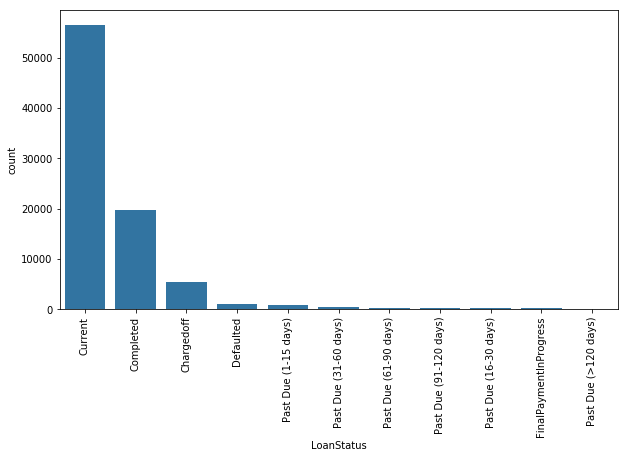

In [64]:
def loanStatus():
    color = sb.color_palette()[0]
    rcParams['figure.figsize'] = 10,5.5
    status_counts = loans['LoanStatus'].value_counts()
    status_sum = loans['LoanStatus'].value_counts().sum()
    freq = status_counts.index
    plt.xticks(rotation=90)
    sb.countplot(data=loans, x='LoanStatus', color=color,order=freq);
loanStatus()

Observation:
> As we can see the majority are currently servicing their loans folllowed by those who have completed
> The past due are classified by days duration range and the one with 120 days due hs the smallest population

## How is the Borrowerrate distributed

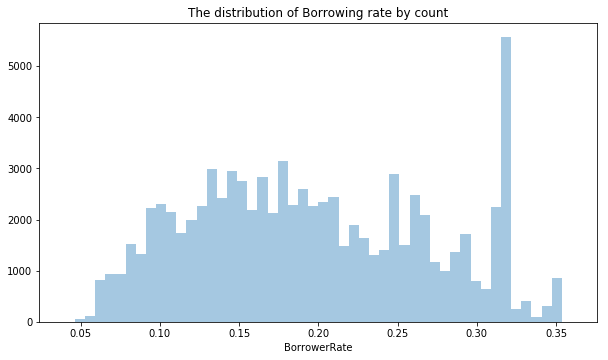

In [65]:
def borrowerRate():
    loans.BorrowerRate.describe()
    sb.distplot(loans['BorrowerRate'], kde=False);
    plt.title('The distribution of Borrowing rate by count')
borrowerRate()

In [66]:
loans.BorrowerRate.describe()

count    84853.000000
mean         0.196022
std          0.074631
min          0.040000
25%          0.135900
50%          0.187500
75%          0.257400
max          0.360000
Name: BorrowerRate, dtype: float64

Observation:
>From the graph, it is very conspicous that the it is skewed to the left.

## How is the prosperity rating (Alpha) distributed

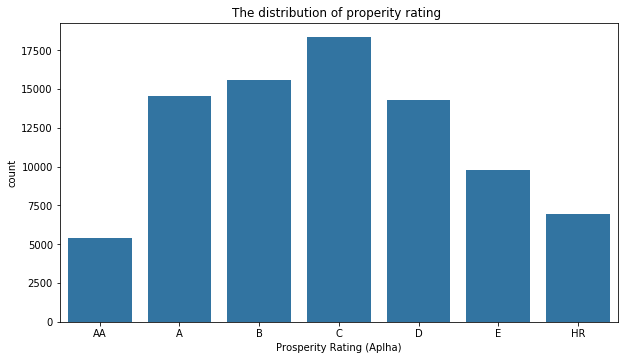

In [67]:
def prosperityrating():
    color = sb.color_palette()[0]
    sb.countplot(data=loans,x='ProsperRating (Alpha)',order=['AA','A','B','C','D','E','HR'],color=color)
    plt.xlabel('Prosperity Rating (Aplha)')
    plt.title('The distribution of properity rating ')
prosperityrating()

Observation:

>From the graph it is clear that the properity rating of majority is at score of C, that can be equated to average perfomance.

## How are the reasons for loans distributed

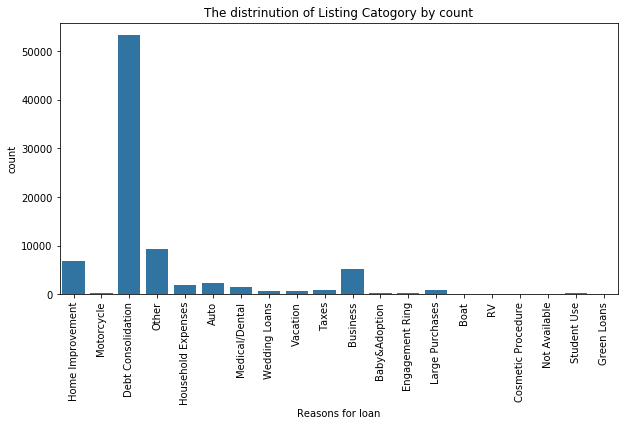

In [68]:
def borrowerReason():
    color = sb.color_palette()[0]
    plt.figure(figsize = [10, 5])
    sb.countplot(data=loans,x='ListingCategory (Alpha)',color=color)
    plt.title('The distrinution of Listing Catogory by count')
    plt.xticks(rotation=90)
    plt.xlabel('Reasons for loan')
borrowerReason()

Observation:

>From the graph, over 50000 of borowers did so because they wanted to consolidate their loans while reason for green Loans was the list.

## How are the Employment status for lenders distiuted

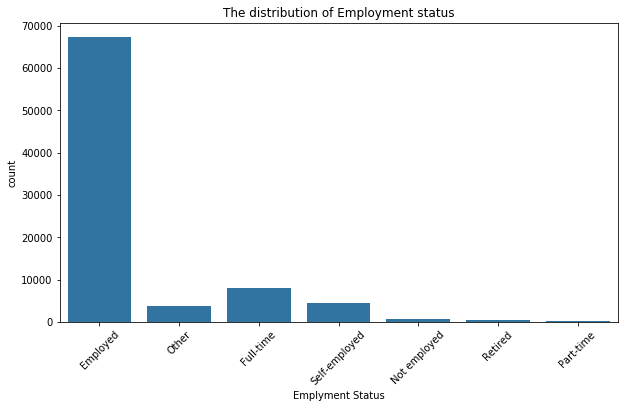

In [69]:
def employmentStatus():
    loans.BorrowerRate.describe()
    color = sb.color_palette()[0]
    sb.countplot(data=loans,x='EmploymentStatus',color=color);
    plt.title('The distribution of Employment status')
    plt.xticks(rotation=45)
    plt.xlabel('Emplyment Status')
employmentStatus()

Observation:

>From the graph,over 60000 borrowers are actually employed and theyr are the majority, while part-time borrowers are the list

## How are the Income range for the borrowers distributed

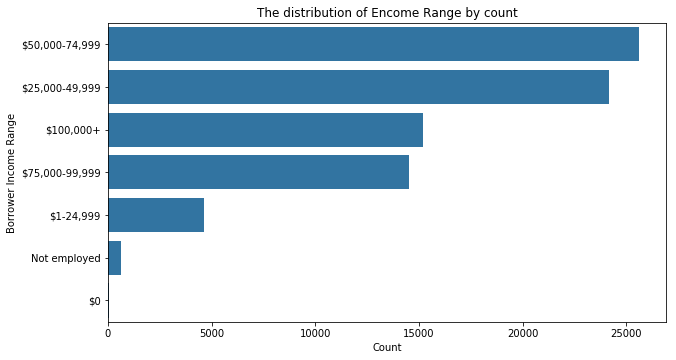

In [70]:
def incomeRange():
    color = sb.color_palette()[0]
    sb.countplot(data = loans, y = 'IncomeRange',color=color)
    plt.title('The distribution of Encome Range by count')
    plt.ylabel('Borrower Income Range')
    plt.xlabel('Count')
incomeRange()

Observation:

>From the graph, those earning between 50000 to 74000 dollars are the majority borrowers while the non-emplyed also benefitted from the loans though the minority from the observation.

## What is the distribution bwtween lenders with mortgage and those without

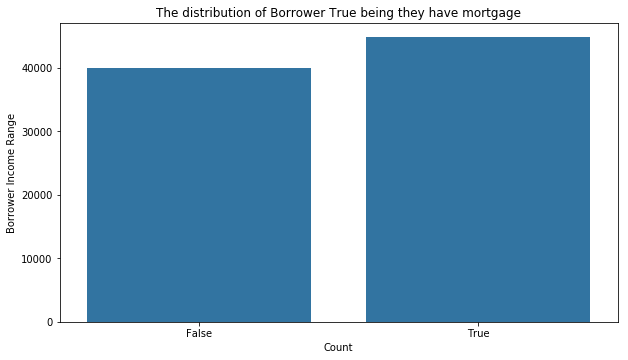

In [71]:
def isBorrower_Homeowner():
    color = sb.color_palette()[0]
    sb.countplot(data = loans, x = 'IsBorrowerHomeowner',color=color)
    plt.title('The distribution of Borrower True being they have mortgage')
    plt.ylabel('Borrower Income Range')
    plt.xlabel('Count')
isBorrower_Homeowner()

Observation:

>From the graph, actually most borrowers have a morgage than those without morgage

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## How are the distribution between loan status defaulted and completed againts various variables

To do this we had to tranform data for loans status and only select the values for dafulted and complated data


In [72]:
#fucntion to calculate the number of completed and defalated borrowers
completed_defalted = (loans['LoanStatus'] == 'Completed') | (loans['LoanStatus'] == 'Defaulted') | (loans['LoanStatus'] == 'Chargedoff')
loans = loans[completed_defalted]

def confirm_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
loans['LoanStatus'] = loans.apply(confirm_defaulted, axis=1)
loans['LoanStatus'].value_counts()


Completed    19664
Defaulted     6341
Name: LoanStatus, dtype: int64

## what is the distribution between defaulted and completed loans  against employment status

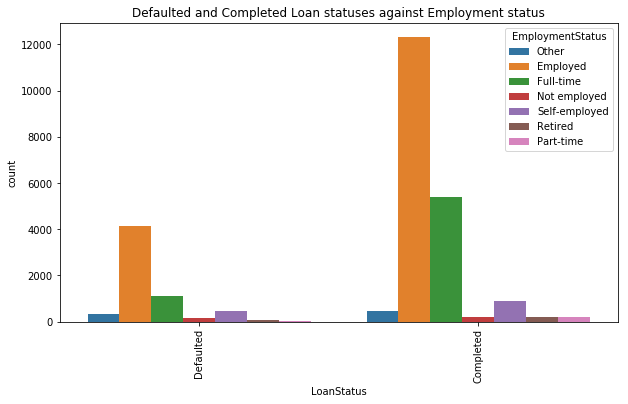

In [73]:
def loan_status_on_employ():
    sb.countplot(data = loans, x = 'LoanStatus', hue = 'EmploymentStatus',orient='v');
    plt.title('Defaulted and Completed Loan statuses against Employment status')
    plt.xticks(rotation=90)
loan_status_on_employ()

Obervation:
>The goal was to get statistics with respect to status of emplyment around dafalted and completed  loans.

> There are 19664 completed loans while those defalted is 6341

> it was considental that most who defalted and completed their loans were the employed borrowers.

## What is the distribution between defaulted and completed loans against their prosperity rating

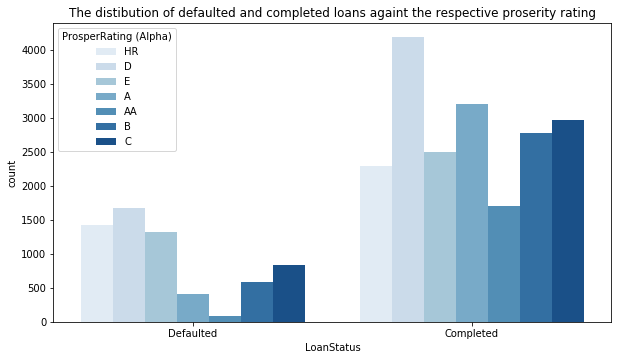

In [74]:
sb.countplot(data = loans, x = 'LoanStatus', hue = 'ProsperRating (Alpha)', palette = 'Blues');
plt.title('The distibution of defaulted and completed loans againt the respective proserity rating');

Observatio:

> from the graph it is clear that the most rating of the dfaulted loans is D while the mosting ratingamong the Completed loasn is D as well

## Is there a direct relationship between borrowing rate and loan original amount

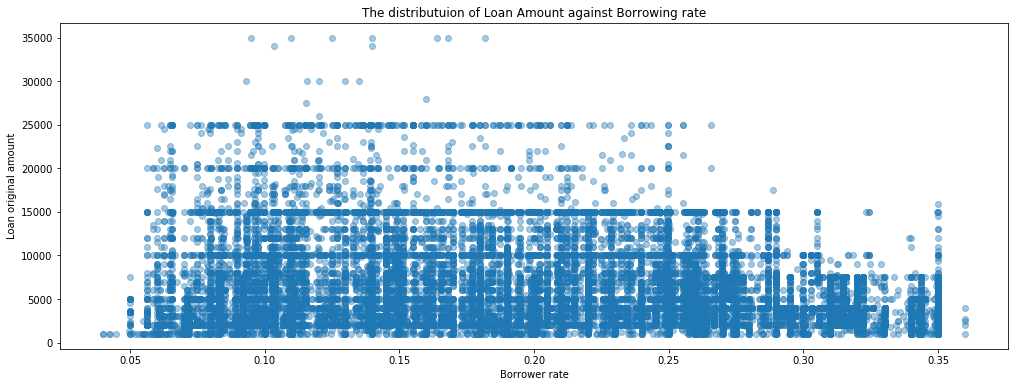

In [75]:
# Scatter plot

plt.figure(figsize = [17, 6]);
sb.regplot(data = loans, y = 'LoanOriginalAmount', x = 'BorrowerRate',scatter_kws={'alpha':0.4},fit_reg= False);
plt.title('The distributuion of Loan Amount against Borrowing rate');
plt.xlabel('Borrower rate');
plt.ylabel('Loan original amount');


Observation:
>This scatter plot did not give the best of depection since the data is enomous but we ca see that their is no abslute relationship between loan original amount and borrowing rate

## How has the borrowing rate affected over the years since 2009 when the listing began

To do this we had to extract the year from the LoanOriginationDate column in the process below

In [76]:
loans.head(2)

,MemberKey,Term,LoanStatus,BorrowerRate,IncomeRange,IsBorrowerHomeowner,ProsperRating (Alpha),ListingCategory (Alpha),BorrowerState,EmploymentStatus,EmploymentStatusDuration,DelinquenciesLast7Years,MonthlyLoanPayment,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations
15,924335448287456229847ED,36,Defaulted,0.3177,"$50,000-74,999",True,HR,Household Expenses,FL,Other,121.0,0.0,173.71,5500.0,NaN,4000,2012-04-19,0
23,93173576199169167625E6A,36,Defaulted,0.2419,"$25,000-49,999",False,D,Medical/Dental,IL,Employed,3.0,0.0,78.67,2500.0,NaN,2000,2013-04-26,0


In [77]:
loans['Year'] = loans['LoanOriginationDate'].dt.year
loans['Month'] = loans['LoanOriginationDate'].dt.month
loans.head(2)

,MemberKey,Term,LoanStatus,BorrowerRate,IncomeRange,IsBorrowerHomeowner,ProsperRating (Alpha),ListingCategory (Alpha),BorrowerState,EmploymentStatus,EmploymentStatusDuration,DelinquenciesLast7Years,MonthlyLoanPayment,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Year,Month
15,924335448287456229847ED,36,Defaulted,0.3177,"$50,000-74,999",True,HR,Household Expenses,FL,Other,121.0,0.0,173.71,5500.0,NaN,4000,2012-04-19,0,2012,4
23,93173576199169167625E6A,36,Defaulted,0.2419,"$25,000-49,999",False,D,Medical/Dental,IL,Employed,3.0,0.0,78.67,2500.0,NaN,2000,2013-04-26,0,2013,4


Text(0.5,1,'The distribution of Borrowing rate over time from 2009 to 2014')

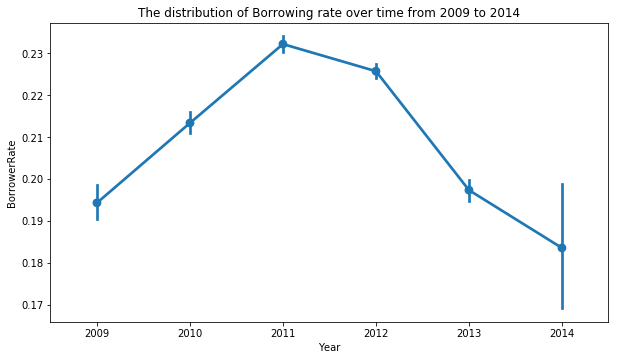

In [78]:
sb.pointplot(data=loans, x="Year", y="BorrowerRate");
plt.title('The distribution of Borrowing rate over time from 2009 to 2014')

Observation:
>Here we had to tranform the data and create a column for the year from the LoanOriginationDate

>We can see that we had been a steady rise in borrowing rate from 2009 to 2011 when again the rate started to drop till 2014 at about 0.2

## What is the pairwise correletion of numerical variable across the selected columns

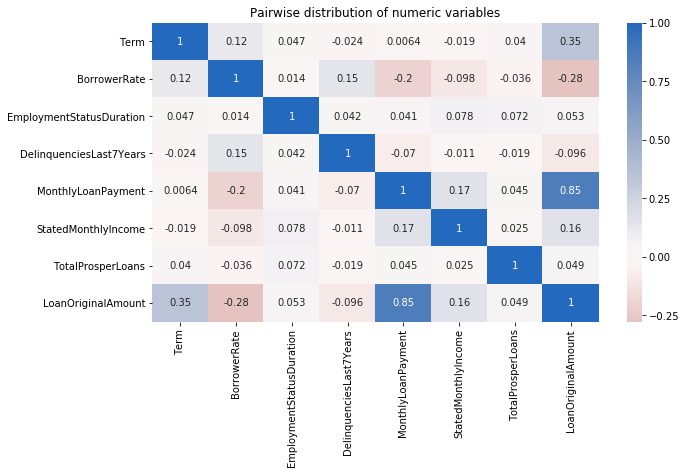

In [79]:
# Numerical features
def pairwise_corr():
    numeric_cols = ['Term','BorrowerRate','IncomeRange','ProsperRating (Alpha)',\
                'ListingCategory (Alpha)', 'BorrowerState','EmploymentStatusDuration',\
                'DelinquenciesLast7Years','MonthlyLoanPayment','StatedMonthlyIncome',\
                'TotalProsperLoans', 'LoanOriginalAmount']
    plt.title('Pairwise distribution of numeric variables')
    sb.heatmap(loans[numeric_cols].corr(), annot = True, cmap = 'vlag_r', center=0)
pairwise_corr()

Observation:
 >I investigated the relationships  to see if any particular pairs have strong correlations. They indeed have a very strong correlation

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

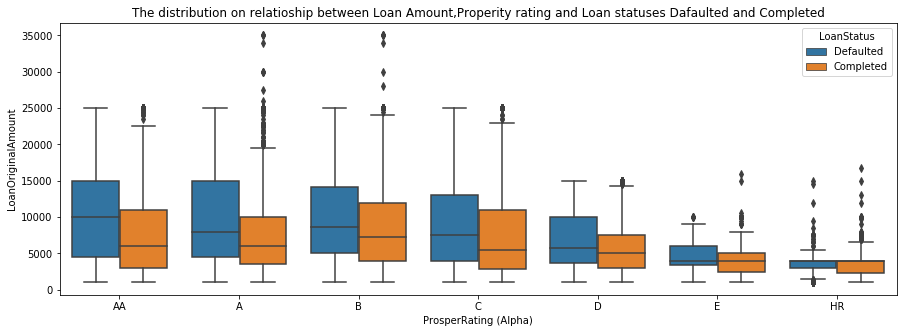

In [80]:
def rel_orignalLoan():
    plt.figure(figsize = [15, 5])
    sb.boxplot(data=loans, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus',order=['AA','A','B','C','D','E','HR'])
    plt.title('The distribution on relatioship between Loan Amount,Properity rating and Loan statuses Dafaulted and Completed')
rel_orignalLoan()

Observation:
>low ratings defaulted loans are  larger than completed.

> The prosperity rating A and B for completed loans tend to have outliers

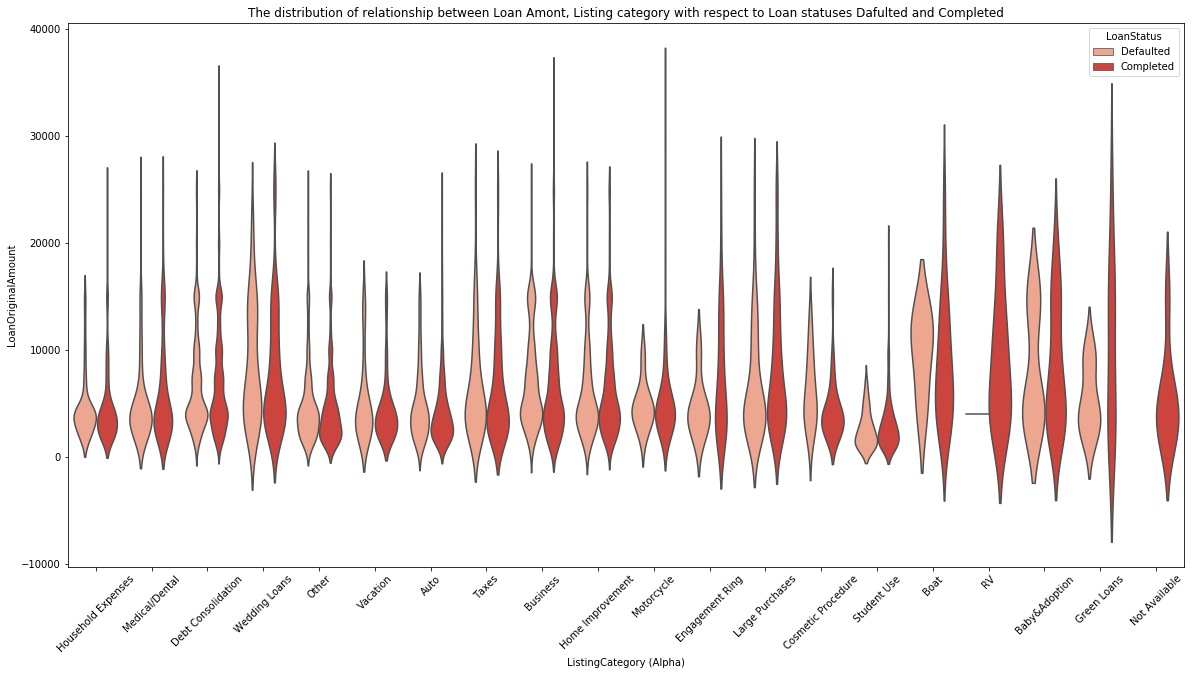

In [81]:
color = sb.color_palette()[0]
plt.figure(figsize = [20, 10])
sb.violinplot(data=loans, x='ListingCategory (Alpha)', y='LoanOriginalAmount', hue='LoanStatus',palette='Reds',inner=None);
plt.title('The distribution of relationship between Loan Amont, Listing category with respect to Loan statuses Dafulted and Completed')
plt.xticks(rotation=45);

Observation:
>Majority of the loan categories had outliers except for borrowers who were credited with student loans but dafaulted.

>Borrowers who completed on category debt consolidation, business,motorcycle and green loans took the highest of the loans but debt consolidation and motorcycle category tend to have high density under 18000 and 10000 respectively.

> The rest of the categories look to have minimal variations in the distribution on relationship of loan original amount the loans status.

> The non-existent category had all borrowers completed on payment.


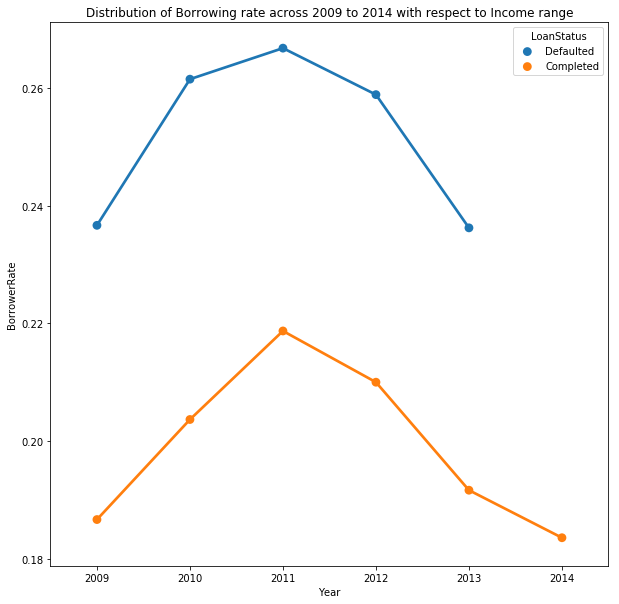

In [82]:
# plots the lineplot to analyze homeowner's and non-homeowner's rate over years
loans['Year'] = loans['LoanOriginationDate'].dt.year
loans['Month'] = loans['LoanOriginationDate'].dt.month
loans.head(2)
plt.figure(figsize=(10,10))
plt.title('Distribution of Borrowing rate across 2009 to 2014 with respect to Income range')
g=sb.pointplot(data=loans, x='Year', y='BorrowerRate', hue='LoanStatus',ci=None);

Observation:
It is also clear that those who defaulted on their loans had high intreret rates on their loans while those who complated has low rates on their loans

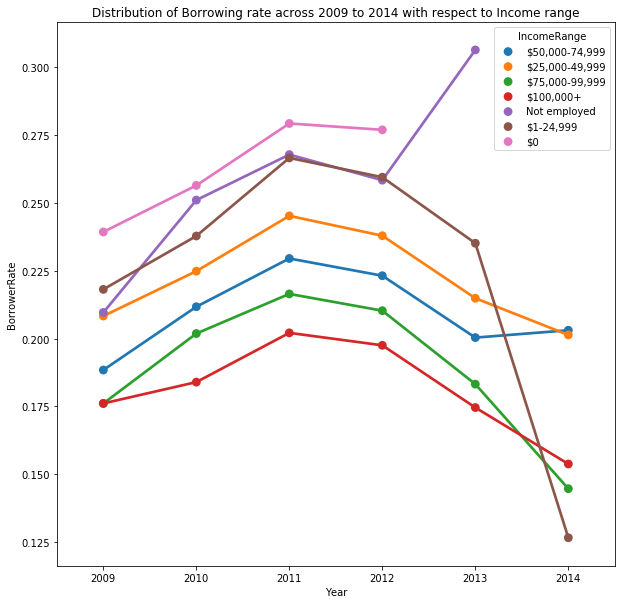

In [83]:
# plots the lineplot to analyze homeowner's and non-homeowner's rate over years
plt.figure(figsize=(10,10))
plt.title('Distribution of Borrowing rate across 2009 to 2014 with respect to Income range')
g=sb.pointplot(data=loans, x='Year', y='BorrowerRate', hue='IncomeRange',ci=None);

Observation:
> of the categories, borrowers with highest of income i.e 100000 and above got loans with borrow rate of between 0.16 and  0.175.

> The categories that went for loan with hihgest rates had no income indicated.

> The middle income borrowers went for loans on middle rate.

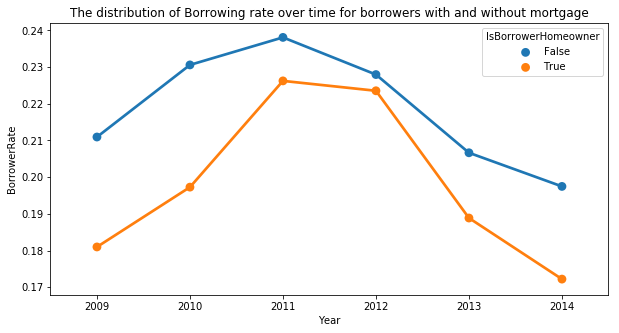

In [84]:
# plots the lineplot to analyze homeowner's and non-homeowner's rate over years
plt.figure(figsize=(10,5))
plt.title('The distribution of Borrowing rate over time for borrowers with and without mortgage')
g=sb.pointplot(data=loans, x='Year', y='BorrowerRate', hue='IsBorrowerHomeowner',ci=None);

Observation:
>Borrowers who are homeowners or have morgage got credits with borrow rates between 0.175 in 2014 and 0.18 in 2009 and picked at 0.225 in 2011.

>Borrowers without morgage got credits with borrow rates between 0.20 in 2014 and 0.21 in 2009 and peaked at 0.239 in 2011.



## Conclusions
>From the finding above we can come up with the following conclusions:
- Borrowers who completed on category debt consolidation, business,motorcycle and green loans took the highest of the loan Amounts.
- Borrows without mortgages tend to get or go for loans with higher interest rates than their compariots with mortgages.
- Borrowers with higheset incomes or salary went for loans that have least intereset rates.
- The non-categorised  borrowers completed their loan payments.
- The numerical variables have have a very strong correlation
